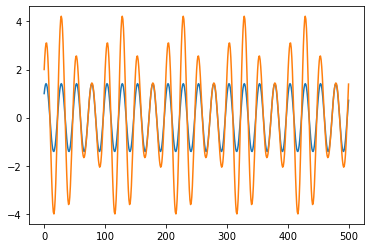

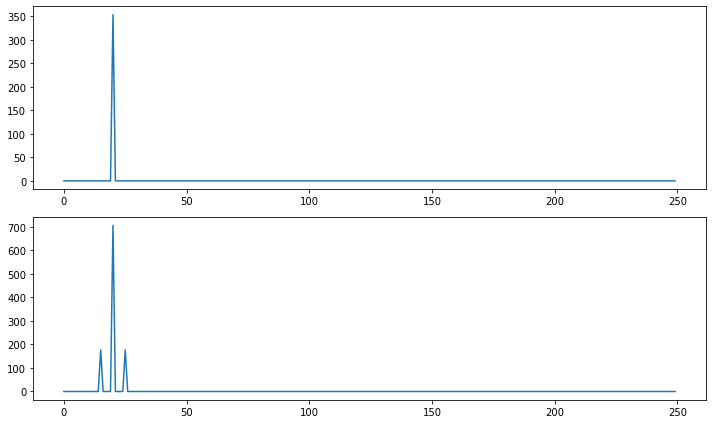

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 生成时间序列
fs = 500  # 采样频率为1000Hz
t = np.arange(0, 1, 1/fs)  # 生成1秒的时间序列

# 生成20Hz的信号
signal_20hz = np.sin(2 * np.pi * 20 * t) + np.cos(2 * np.pi * 20 * t)

signal_5hz = np.sin(2 * np.pi * 5 * t) + 2

# 将两个信号相乘
result_signal = signal_20hz * signal_5hz
plt.plot(signal_20hz)
plt.plot(result_signal)
# 进行频谱分析
freq = np.fft.fftfreq(len(t), 1/fs)  # 计算频率轴
spectrum_20hz = np.abs(np.fft.fft(signal_20hz))  # 20Hz信号的频谱
spectrum_result = np.abs(np.fft.fft(result_signal))  # 相乘后信号的频谱

# 绘制原始信号和相乘后信号的频谱
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq[:len(freq)//2], spectrum_20hz[:len(freq)//2])

plt.subplot(2, 1, 2)
plt.plot(freq[:len(freq)//2], spectrum_result[:len(freq)//2])

plt.tight_layout()
plt.show()

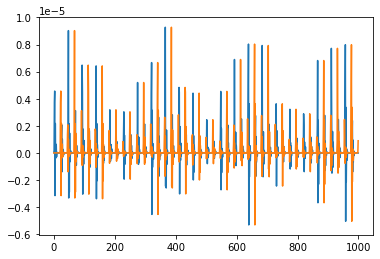

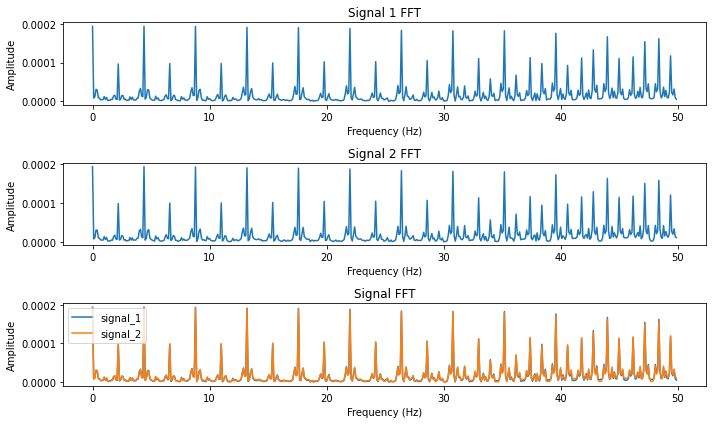

In [23]:
import numpy as np
from Code.toolbox import compare_freq
import matplotlib.pyplot as plt
from Code.Tutorial.add_noises import add_echo_noise
def load_(path):
    data = np.load(path)
    signals, labels = data[:, :1000], data[:, 1000:]
    return signals, labels

signals_n_0, labels_n_0 = load_('../../Data/Normal/sim_5000_0_90_140_train_normal.npy')
signals_n_1, labels_n_1 = load_('../../Data/Normal/sim_5000_0.1_90_140_train_normal.npy')
signals_n_4, labels_n_4 = load_('../../Data/Normal/sim_5000_0.4_90_140_train_normal.npy')
signals_n_8, labels_n_8 = load_('../../Data/Normal/sim_5000_0.8_90_140_train_normal.npy')

idx = 10
signal = signals_n_0[idx]
# noisy_signal = add_echo_noise(signal, 1, attenuation_factor=[1], delay_factor=[50])
signal_ = signal.copy()
d_factory = 20
signal_ = signal_ * 1

signal_[d_factory:] = signal_[:-d_factory]
signal_[:d_factory] = 0
plt.plot(signal)
plt.plot(signal_)
# original_signal += attenuation_signal
compare_freq(signal, signal_)